warmUpExercise
-----------------

In [37]:
import numpy as np
from numpy import ones, zeros, dot, newaxis, column_stack, linspace, mean, std, divide
from numpy.linalg import pinv
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score, mean_squared_error as mse

%matplotlib inline

In [2]:
np.identity(5)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

Part 2: Plotting
-----------------

In [38]:
file_path = '/home/disooqi/ml/machine-learning-ex1/ex1/ex1data1.txt'
# Load data from a text file.
data = np.loadtxt('ex1data1.txt', delimiter=',')

# Load data from a text file, with missing values handled as specified
data01 = np.genfromtxt('ex1data1.txt', delimiter=',')

# Construct an array from data in a text or binary file.
data02 = np.fromfile('ex1data1.txt')

In [39]:
# X = data(:, 1); y = data(:, 2);
X1 = data[:,0]
y = data[:, 1]
m = len(y)

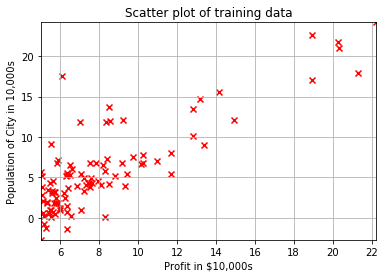

In [40]:
plt.scatter(X1,y, color='r', marker='x')
plt.title("Scatter plot of training data")

plt.xlabel("Profit in $10,000s")
plt.ylabel("Population of City in 10,000s")
plt.autoscale(tight=True)
plt.grid()

# plt.xticks(())
# plt.yticks(())
plt.show()

Part 3: Gradient descent
---------------------------

In [6]:
#% Add a column of ones to x to take into account the intercept term (θ0)
X = np.column_stack((np.ones((m,1)),data[:,0]))

#% initialize fitting parameters
theta = np.zeros((2, 1))

In [7]:
#% Some gradient descent settings
iterations = 1500
alpha = 0.01

In [8]:
# feature scaling and mean normalization
normalized_X = (X[:,1] - np.mean(X, axis=0)[1])/(np.max(X[:,1])-np.min(X[:,1]))
normalized_X = np.column_stack((np.ones((m,1)),normalized_X))

In [9]:
#% compute and display initial cost
def computeCost(X, y, theta):
    m = len(y)
    h = np.dot(X,theta)
    return np.sum((h-y[:,newaxis])**2)/(2*m)

In [14]:
def gradientDescent(X, y, theta, alpha, num_iters):
    '''GRADIENTDESCENT Performs gradient descent to learn theta
    theta = GRADIENTDESENT(X, y, theta, alpha, num_iters) updates theta by 
    taking num_iters gradient steps with learning rate alpha'''
    J_history = zeros((num_iters, 1))
    m = len(y)
    for i in range(num_iters):   # changed from xrange to range
        J_history[i] = computeCost(X, y, theta)
        h = dot(X, theta)
        diff = h-y[:,newaxis]
        # B = np.repeat(diff,2,1)
        # theta = theta - (alpha/m) * (((X * theta) - y)'  *  X)';
        theta = theta - (alpha/m)*dot(diff.T, X).T
           
    return theta, J_history

In [15]:
optimized_theta, J_history = gradientDescent(X, y, theta, alpha, iterations)

In [17]:
predict1 = np.dot([1, 3.5], optimized_theta);
predict2 = np.dot([1, 7], optimized_theta);

print ('For population = 35,000, we predict a profit of ', 10000*predict1[0])
print ('For population = 70,000, we predict a profit of ', 10000*predict2[0])

For population = 35,000, we predict a profit of  4519.7678677
For population = 70,000, we predict a profit of  45342.4501294


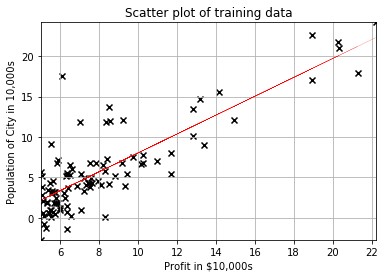

In [18]:
# plot the linear fit
plt.scatter(X1,y, color='black', marker='x')
# draw vertical line from (70,100) to (70, 250)
plt.plot(X1, dot(X,optimized_theta), 'r-', lw=0.1)
plt.title("Scatter plot of training data")

plt.xlabel("Profit in $10,000s")
plt.ylabel("Population of City in 10,000s")
plt.autoscale(tight=True)
plt.grid()

# plt.xticks(())
# plt.yticks(())
plt.show()

In [69]:
alphas = linspace(0.00001, 0.00009, 10) #
js = list()
for a in alphas.flat:
    optimized_theta, J_history = gradientDescent(X, y, theta, a, iterations)
    js.append(J_history)
print (len(js))
js[0].shape

10


(1500, 1)

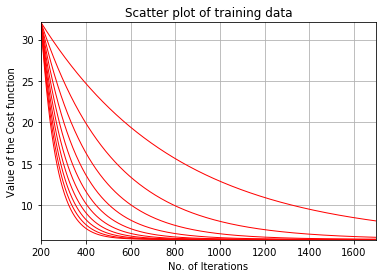

In [73]:
# learning plot
#plt.scatter(X1,y, color='black', marker='x')
# draw vertical line from (70,100) to (70, 250)
for i in range(len(js)):
    plt.plot(np.arange(-1,1499), js[i], 'r-', lw=1)
plt.title("Scatter plot of training data")

plt.xlabel("No. of Iterations")
plt.ylabel("Value of the Cost function")
plt.autoscale(tight=True)
plt.grid()

# plt.xticks(())
# plt.yticks(())
plt.show()

## Examining the Effect of the Learning Rate using Keras

In [41]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, Adam

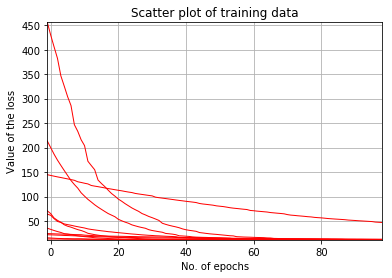

In [77]:
alpha_cost_fns = list()
for learning_rate in alphas:
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(1,), activation='linear'))

    model.compile(SGD(lr=learning_rate), loss='mean_squared_error')
                  #optimizer='sgd')

    history = model.fit(X1, y, epochs=100, verbose=0)
    plt.plot(np.arange(-1,99), history.history['loss'], 'r-', lw=1)

plt.title("Scatter plot of training data")

plt.xlabel("No. of epochs")
plt.ylabel("Value of the loss")
plt.autoscale(tight=True)
plt.grid()

# plt.xticks(())
# plt.yticks(())
plt.show()

In [72]:
len(history.history['loss'])

40

In [22]:
#http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]
diabetes_X_train.shape, diabetes_y_train.shape

((422, 1), (422,))

In [26]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X1[:,newaxis], y)

print ('Coefficients: ', regr.coef_)
print("Residual sum of squares: %.2f" % np.mean((regr.predict(X1[:,newaxis]) - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X1[:,newaxis], y))
print("The R2 score is {:0.3f}".format(r2_score(y, regr.predict(X1[:,newaxis]))))
print("The Mean squared Error score is {:0.3f}".format(mse(y, regr.predict(X1[:,newaxis]))))

Coefficients:  [ 1.19303364]
Residual sum of squares: 8.95
Variance score: 0.70
The R2 score is 0.702
The Mean squared Error score is 8.954


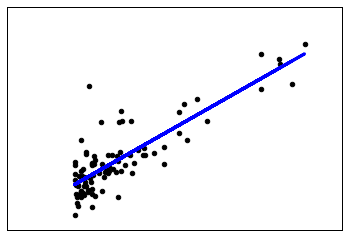

In [18]:
# Plot outputs
plt.scatter(X1[:,newaxis], y,  color='black')
plt.plot(X1[:,newaxis], regr.predict(X1[:,newaxis]), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

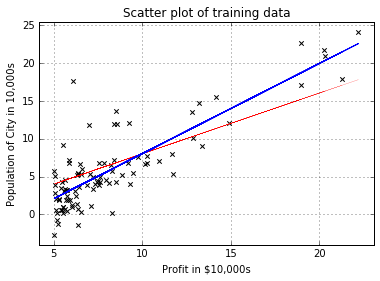

In [19]:
# plot the linear fit
plt.scatter(X1,y, color='black', marker='x')
# draw vertical line from (70,100) to (70, 250)
plt.plot(X1, dot(X,optimized_theta), 'r-', lw=0.1)
plt.plot(X1[:,newaxis], regr.predict(X1[:,newaxis]), color='blue',
         linewidth=1)
plt.title("Scatter plot of training data")

plt.xlabel("Profit in $10,000s")
plt.ylabel("Population of City in 10,000s")
plt.autoscale(tight=True)
plt.grid()

# plt.xticks(())
# plt.yticks(())
plt.show()

------
Optional Exercises
=========
Linear regression with multiple variables

In [20]:
# Load data from a text file.
data = np.loadtxt('ex1data2.txt', delimiter=',')

# Load data from a text file, with missing values handled as specified
data01 = np.genfromtxt('ex1data2.txt', delimiter=',')

# Construct an array from data in a text or binary file.
data02 = np.fromfile('ex1data2.txt')

In [21]:
X = data[:,:2]
y = data[:, 2]
m = len(y)

In [22]:
print 'First 10 examples from the dataset:'
print X[:10,:]
print y[:10][:,newaxis]

First 10 examples from the dataset:
[[  2.10400000e+03   3.00000000e+00]
 [  1.60000000e+03   3.00000000e+00]
 [  2.40000000e+03   3.00000000e+00]
 [  1.41600000e+03   2.00000000e+00]
 [  3.00000000e+03   4.00000000e+00]
 [  1.98500000e+03   4.00000000e+00]
 [  1.53400000e+03   3.00000000e+00]
 [  1.42700000e+03   3.00000000e+00]
 [  1.38000000e+03   3.00000000e+00]
 [  1.49400000e+03   3.00000000e+00]]
[[ 399900.]
 [ 329900.]
 [ 369000.]
 [ 232000.]
 [ 539900.]
 [ 299900.]
 [ 314900.]
 [ 198999.]
 [ 212000.]
 [ 242500.]]


Normalizing Features
--------------------

In [23]:
def featureNormalize(X):
    if X.ndim == 2:
        col_count = X.shape[1]
    mu = zeros((1, col_count))
    sigma = zeros((1, col_count))
    
    mu = mean(X, axis=0)
    sigma = std(X, axis=0)
    
    return divide(X-mu, sigma), mu, sigma

In [24]:
normalized_X, X_mean, X_sigma = featureNormalize(X)

In [25]:
X = column_stack((ones((m, 1)), normalized_X))

In [26]:
alpha = 0.01
num_iters = 400

In [27]:
theta = zeros((3,1))

In [28]:
optimized_theta, J_history = gradientDescent(X, y, theta, alpha, num_iters)

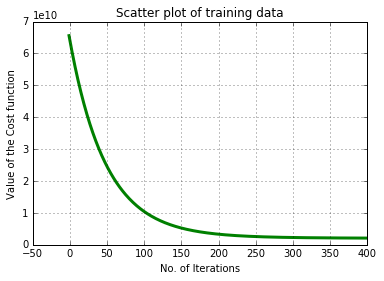

In [29]:
# learning plot
#plt.scatter(X1,y, color='black', marker='x')
# draw vertical line from (70,100) to (70, 250)
#for i in range(10):
plt.plot(np.arange(-1,num_iters-1), J_history, 'g-', lw=3)
plt.title("Scatter plot of training data")

plt.xlabel("No. of Iterations")
plt.ylabel("Value of the Cost function")
#plt.autoscale(tight=True)
plt.grid()

# plt.xticks(())
# plt.yticks(())
plt.show()

In [30]:
print 'Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):'
x = np.array([1650, 3]).reshape((1,2))
norm_x = divide(x-X_mean, X_sigma)

print dot(column_stack(([1], norm_x)), optimized_theta)[0,0]

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
289221.547371


Part 3: Normal Equations
==


In [31]:
def normalEqn(X, y):
    '''return: optimized theta'''
    return dot(dot(pinv(dot(X.T, X)), X.T), y)

In [32]:
otheta = normalEqn(X, y)[:,newaxis]
print 'Theta computed from the normal equations: ', otheta

Theta computed from the normal equations:  [[ 340412.65957447]
 [ 109447.79646964]
 [  -6578.35485416]]


In [33]:
print 'Predicted price of a 1650 sq-ft, 3 br house (using Normal Equations):', \
dot(column_stack(([1], norm_x)),otheta)[0,0]

Predicted price of a 1650 sq-ft, 3 br house (using Normal Equations): 293081.464335


In [34]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X[:,1:],y)

regr.predict(norm_x)

array([ 293081.4643349])

# http://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html


## Linear Regression with Keras

In [2]:
from keras.models import Sequential     # adding elements into this model in a sequence
from keras.layers import Dense
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [25]:
model = Sequential()

In [26]:
model.add(Dense(1, input_shape=(1,)))

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Epoch 1/40
97/97 [==============================] - 0s - loss: 21.5524     
Epoch 2/40
97/97 [==============================] - 0s - loss: 37.5917     
Epoch 3/40
97/97 [==============================] - 0s - loss: 45.1855     
Epoch 4/40
97/97 [==============================] - 0s - loss: 19.5264     
Epoch 5/40
97/97 [==============================] - 0s - loss: 46.1624     
Epoch 6/40
97/97 [==============================] - 0s - loss: 12.4132     
Epoch 7/40
97/97 [==============================] - 0s - loss: 29.6052     
Epoch 8/40
97/97 [==============================] - 0s - loss: 10.1441    
Epoch 9/40
97/97 [==============================] - 0s - loss: 15.5812     
Epoch 10/40
97/97 [==============================] - 0s - loss: 8.8372     
Epoch 11/40
97/97 [==============================] - 0s - loss: 12.8737     
Epoch 12/40
97/97 [==============================] - 0s - loss: 10.7032    
Epoch 13/40
97/97 [==============================] - 0s - loss: 9.6612      
Epoch 14/40

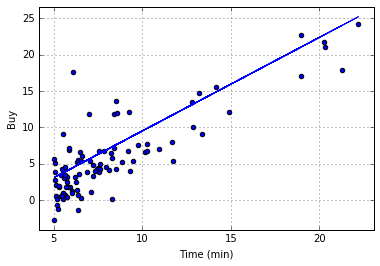

In [51]:
model.compile(Adam(lr=0.8), 'mean_squared_error')
model.fit(X1, y, epochs=40)

y_pred = model.predict(X1)

ax = plt.scatter(X1, y)
plt.plot(X1, y_pred, color='blue',
         linewidth=1)
plt.xlabel("Time (min)")
plt.ylabel("Buy")
plt.autoscale(tight=True)
plt.grid()


In [54]:
W, B = model.get_weights()
print 'W = ', W
print 'B = ', B

W =  [[ 1.28640068]]
B =  [-3.35283661]
